In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
dataset = pd.read_csv('Advertising.csv',index_col=0) 
#index_col=0 , This is to allow you to set which columns to be used as the index of the dataframe.
dataset.index.name = "S.no" #giving name to the index 0
print("Dataset Uploaded successfully")

Dataset Uploaded successfully


In [3]:
print('\033[1m' + 'Dataset for Sales in Advertising:'+ '\033[0m') #for bold text
dataset

Dataset for Sales in Advertising:


,TV,Radio,Newspaper,Sales
S.no,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [4]:
print("Random Rows: \n")
dataset.sample(5)

Random Rows: 



,TV,Radio,Newspaper,Sales
S.no,,,,
89,88.3,25.5,73.4,12.9
103,280.2,10.1,21.4,14.8
10,199.8,2.6,21.2,10.6
85,213.5,43.0,33.8,21.7
163,188.4,18.1,25.6,14.9


In [5]:
#Total rows and columns in dataset
dataset.shape

(200, 4)

In [6]:
print("Names of columns in advertising sales prediction dataset are: \n\n",dataset.columns)

Names of columns in advertising sales prediction dataset are: 

 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [7]:
print('\033[1m' + 'Information of dataset:' + '\033[0m\n\n')
dataset.info()

Information of dataset:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
print("Size of dataset is: ",dataset.size)

Size of dataset is:  800


In [9]:
dc = dataset.corr()
print("Correlation :\n")
dc


Correlation :



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
print("Statistics summary: \n")
dataset.describe()


Statistics summary: 



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


[Text(0.5, 1.0, 'Heatmap of Correlated values')]

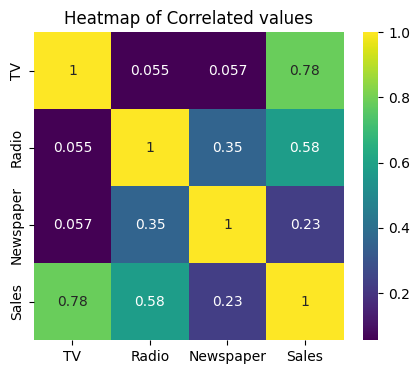

In [11]:
# Defining figure size for the output plot 
fig, ax = plt.subplots(figsize = (5, 4))
#heatmap plot :  to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones
#Use annot to represent the cell values with text
sea.heatmap(dc, annot=True, cmap="viridis").set(title='Heatmap of Correlated values')

In [12]:
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [13]:
dataset.duplicated().value_counts()

False    200
dtype: int64

In [14]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

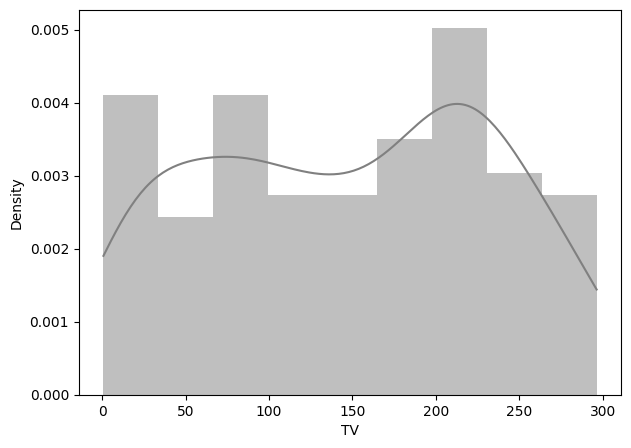

In [15]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['TV'], color="grey", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

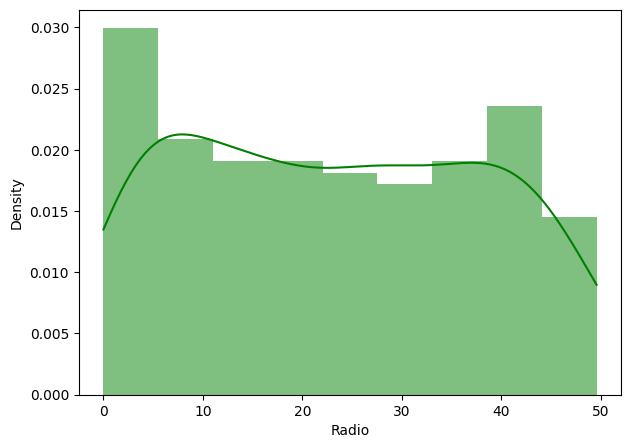

In [16]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Radio'], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

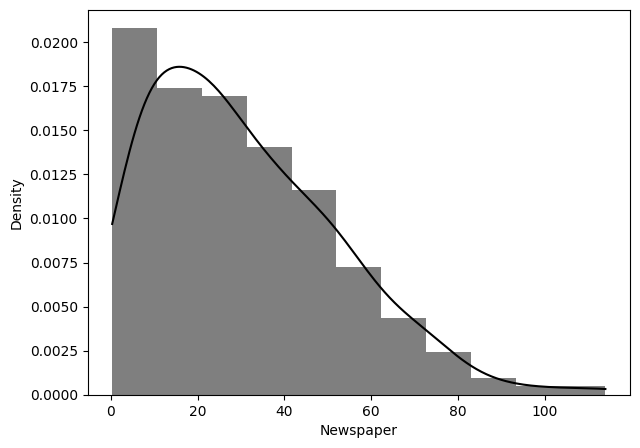

In [17]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Newspaper'], color="black", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

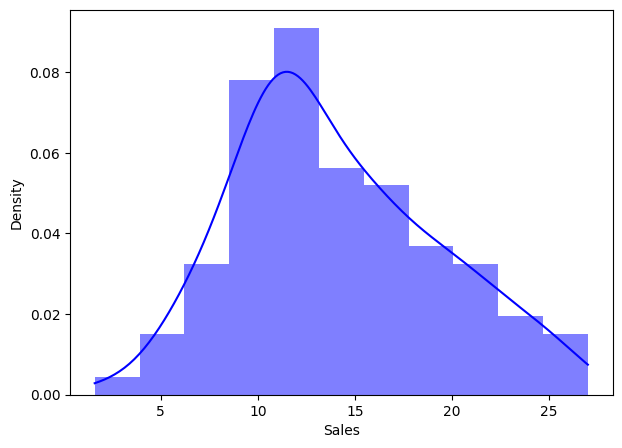

In [18]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Sales'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

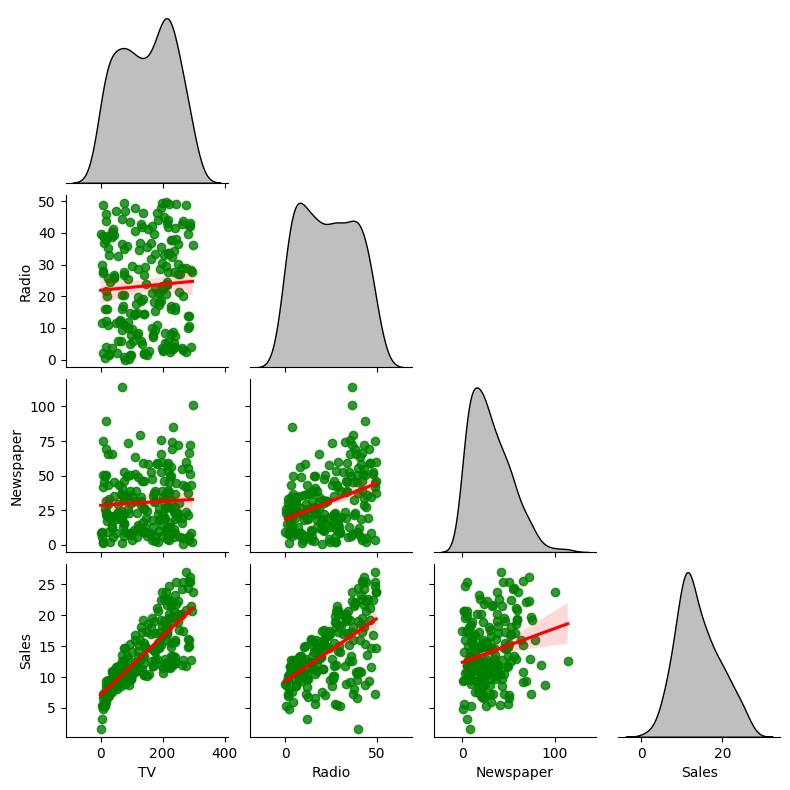

In [19]:
sea.pairplot(dataset,corner=True,diag_kind='kde',kind='reg',height=2,plot_kws={'color':'green','line_kws':{'color':'red'}},diag_kws={'color':'black'})

In [20]:
x =np.array(dataset.drop(labels=['Sales'], axis=1))

In [21]:
y =np.array(dataset['Sales'])

In [22]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state = 45)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)

Shape of x_train (160, 3)
Shape of y_train (160,)


In [25]:
reg = LinearRegression()
reg.fit(x, y)  # X is the input features and y is the target variable
coefficients = reg.coef_
coefficients

array([ 0.04576465,  0.18853002, -0.00103749])

In [24]:
intercept = reg.intercept_
intercept

2.938889369459412

In [26]:
#The pred variable now contains all the predicted values for the input values in the X_test
pred = reg.predict(x_test)


#Show the prediction of sales and the test part of sales 
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,predicted_sales
0,14.9,15.161523
1,8.8,10.366849
2,16.6,16.377665
3,23.8,21.898052
4,12.0,15.610039
5,9.7,8.826300
6,19.0,18.223901
7,11.8,11.445924
8,18.5,17.597830
9,8.5,8.887880


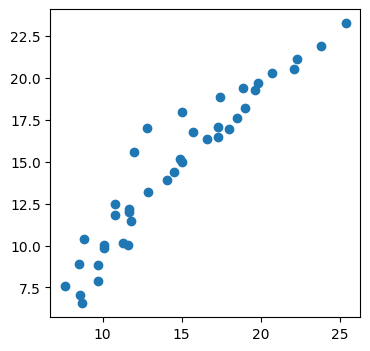

In [27]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, pred)

In [28]:
mae = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 1.04


In [29]:
mse = mean_squared_error(y_test, pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 2.02


In [30]:
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1.42
